In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

seed = 777
torch.manual_seed(seed)
np.random.seed(seed)

device = torch.device("mps")
device

device(type='mps')

# Data Analysis

In [2]:
df = pd.read_csv(
    "dataset/Whisper_UDPDOS.txt",
    delimiter=" ",
    header=None,
    names=["Timestamp", "Packet_Length", "Label"],
    dtype=np.float64,
)
df.head()

,Timestamp,Packet_Length,Label
0,0.000000,308.0,0.0
1,0.002526,52.0,0.0
2,0.013341,168.0,0.0
3,0.016349,160.0,0.0
4,0.061599,52.0,0.0


In [3]:
df["IAT"] = df["Timestamp"].diff().fillna(0)
df.head()

,Timestamp,Packet_Length,Label,IAT
0,0.000000,308.0,0.0,0.000000
1,0.002526,52.0,0.0,0.002526
2,0.013341,168.0,0.0,0.010815
3,0.016349,160.0,0.0,0.003008
4,0.061599,52.0,0.0,0.045250


In [4]:
df["IAT"].quantile([0.1 * i for i in range(10)])

0.0   -7.285745e+01
0.1    9.537000e-07
0.2    1.907300e-06
0.3    2.145700e-06
0.4    2.861000e-06
0.5    2.861000e-06
0.6    3.099400e-06
0.7    3.099500e-06
0.8    3.814700e-06
0.9    4.053100e-06
Name: IAT, dtype: float64

In [5]:
df["IAT"].min(), df["IAT"].max()

(-72.857446909, 0.8492069244400002)

In [6]:
df["IAT"].quantile([0.85, 0.9, 0.95, 0.998, 0.999, 1])

0.850    0.000004
0.900    0.000004
0.950    0.000005
0.998    0.000158
0.999    0.000182
1.000    0.849207
Name: IAT, dtype: float64

In [7]:
min_iat = 0
max_iat = df["IAT"].quantile(0.95)

In [8]:
df["IAT_norm"] = df["IAT"].clip(lower=min_iat, upper=max_iat) / max_iat
df.head()

,Timestamp,Packet_Length,Label,IAT,IAT_norm
0,0.000000,308.0,0.0,0.000000,0.0
1,0.002526,52.0,0.0,0.002526,1.0
2,0.013341,168.0,0.0,0.010815,1.0
3,0.016349,160.0,0.0,0.003008,1.0
4,0.061599,52.0,0.0,0.045250,1.0


In [9]:
df.iloc[1]

Timestamp         0.002526
Packet_Length    52.000000
Label             0.000000
IAT               0.002526
IAT_norm          1.000000
Name: 1, dtype: float64

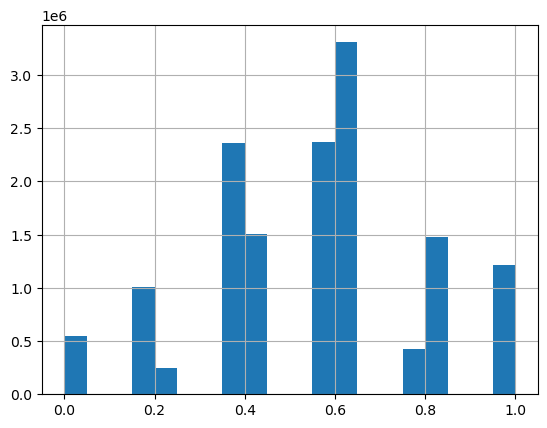

In [10]:
df["IAT_norm"].hist(bins=20)
plt.show()

In [11]:
df["PL_norm"] = df["Packet_Length"].clip(lower=0, upper=1500) / 1500
df.head()

,Timestamp,Packet_Length,Label,IAT,IAT_norm,PL_norm
0,0.000000,308.0,0.0,0.000000,0.0,0.205333
1,0.002526,52.0,0.0,0.002526,1.0,0.034667
2,0.013341,168.0,0.0,0.010815,1.0,0.112000
3,0.016349,160.0,0.0,0.003008,1.0,0.106667
4,0.061599,52.0,0.0,0.045250,1.0,0.034667


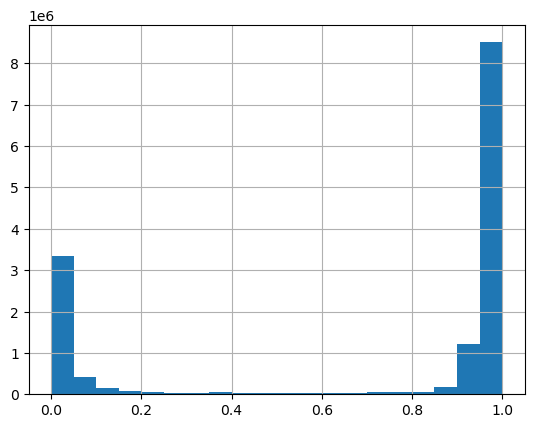

In [12]:
df["PL_norm"].hist(bins=20)
plt.show()

In [13]:
df_new = df[["IAT_norm", "PL_norm", "Label"]].reset_index(drop=True)
df_new.head()

,IAT_norm,PL_norm,Label
0,0.0,0.205333,0.0
1,1.0,0.034667,0.0
2,1.0,0.112000,0.0
3,1.0,0.106667,0.0
4,1.0,0.034667,0.0


In [14]:
df_new["Label"].value_counts()

Label
0.0    12502466
1.0     1950463
Name: count, dtype: int64

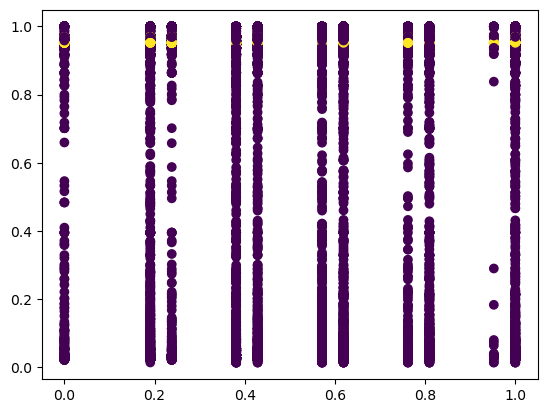

In [15]:
# plt.rcParams['agg.path.chunksize'] = 10000
chunk = df_new.iloc[9_750_000:9_800_000]
plt.scatter(chunk["IAT_norm"], chunk["PL_norm"], c=chunk["Label"])
plt.show()

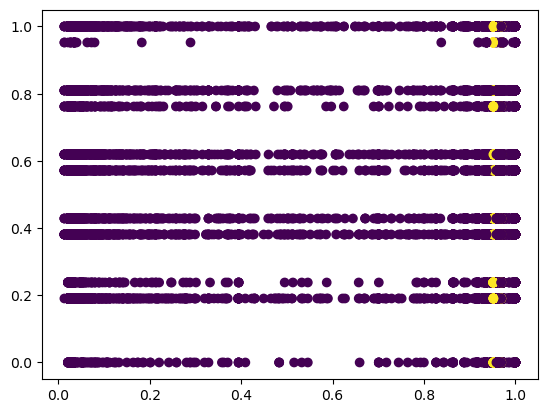

In [16]:
plt.scatter(chunk["PL_norm"], chunk["IAT_norm"], c=chunk["Label"])
plt.show()

In [17]:
chunk["PL_norm"].quantile([0.1 * i for i in range(10)])

0.0    0.013333
0.1    0.034667
0.2    0.072667
0.3    0.937333
0.4    0.952000
0.5    0.952000
0.6    0.952000
0.7    0.965333
0.8    0.969333
0.9    1.000000
Name: PL_norm, dtype: float64

In [18]:
df_new[df_new["PL_norm"] > 0.9].count()

IAT_norm    9735006
PL_norm     9735006
Label       9735006
dtype: int64

In [19]:
df_new[df_new["PL_norm"] <= 0.9].count()

IAT_norm    4717923
PL_norm     4717923
Label       4717923
dtype: int64

In [20]:
df_new[df_new["PL_norm"] <= 0.9]["IAT_norm"].quantile([0.05 * i for i in range(20)])

0.00    0.000000
0.05    0.190481
0.10    0.380942
0.15    0.380942
0.20    0.380962
0.25    0.380962
0.30    0.428557
0.35    0.428577
0.40    0.571423
0.45    0.571423
0.50    0.571423
0.55    0.571443
0.60    0.619038
0.65    0.619038
0.70    0.619058
0.75    0.619058
0.80    0.761904
0.85    0.809519
0.90    0.809519
0.95    1.000000
Name: IAT_norm, dtype: float64

# Dataset Construction

In [21]:
df_new.head()

,IAT_norm,PL_norm,Label
0,0.0,0.205333,0.0
1,1.0,0.034667,0.0
2,1.0,0.112000,0.0
3,1.0,0.106667,0.0
4,1.0,0.034667,0.0


In [22]:
df_new.shape

(14452929, 3)

In [23]:
from sklearn.model_selection import train_test_split as sklearn_split


def create_dataset(df, train_test_split, segment_length=2048, increments=64):
    """
    From dataframe, segment the data, doing increments.
    E.g. if segment_length = 2048, increments = 64, then take 2048/64 = 32 steps.
    From that new segments, take only segments if they have at least 1 packet that has label 1
    Meaning, we exclude segments with only normal segments (all labelled 0).
    Finally, we shuffle them, and split them according to train_test_split ratio
    """
    # Calculate step size (increment)
    step_size = segment_length // increments

    # Create segments
    segments = []
    for i in range(0, len(df) - segment_length + 1, step_size):
        segment = df.iloc[i : i + segment_length]

        # Check if the segment has at least one packet with label 1
        if 1 in segment["Label"].values:  # Assuming the label column is named 'label'
            segments.append(segment)

    # If no segments with label 1 were found
    if len(segments) == 0:
        return None, None

    # Shuffle segments
    np.random.shuffle(segments)

    # Split into training and testing sets
    split_idx = int(len(segments) * train_test_split)
    train_segments = segments[:split_idx]
    test_segments = segments[split_idx:]

    return train_segments, test_segments

In [24]:
from torch.utils.data import DataLoader, TensorDataset


# Function to convert segments to features and labels
def prepare_data(segments):
    features = []
    labels = []

    for segment in segments:
        X = segment.drop("Label", axis=1).values

        # Extract labels
        y = segment["Label"].values

        features.append(X)
        labels.append(y)

    # Convert to PyTorch tensors
    features_tensor = torch.FloatTensor(np.array(features))
    labels_tensor = torch.LongTensor(np.array(labels))

    return features_tensor, labels_tensor


def load_dataset(train_segments, test_segments, batch_size=32):
    """
    Converts the training and testing segments into PyTorch DataLoader objects.

    Parameters:
    train_segments (list): List of dataframes containing training segments
    test_segments (list): List of dataframes containing testing segments
    batch_size (int): Batch size for DataLoader

    Returns:
    tuple: (train_loader, test_loader) PyTorch DataLoader objects
    """
    # Prepare training data
    X_train, y_train = prepare_data(train_segments)
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Prepare testing data
    X_test, y_test = prepare_data(test_segments)
    test_dataset = TensorDataset(X_test, y_test)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

In [25]:
train_test_ratio = 0.8
segment_length = 1024
increment = 8
batch_size = 32

train_segments, test_segments = create_dataset(
    df_new, train_test_ratio, segment_length, increment
)
train_loader, test_loader = load_dataset(
    train_segments, test_segments, batch_size=batch_size
)

In [26]:
len(train_segments), len(test_segments), len(train_loader), len(test_loader)

(59930, 14983, 1873, 469)

# Model Definition

In [27]:
import torch.nn as nn


class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        """
        Double convolution block for U-Net.

        Parameters:
        in_channels (int): Number of input channels
        out_channels (int): Number of output channels
        """
        super(ConvBlock, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.conv(x)


class TimeSeriesUNet(nn.Module):
    def __init__(self, input_features, base_filters=64, depth=3):
        """
        U-Net architecture for time-series semantic segmentation.

        Parameters:
        input_features (int): Number of features per time step
        base_filters (int): Number of base filters (will be doubled in each layer)
        depth (int): Depth of the U-Net (number of down/up-sampling operations)
        """
        super(TimeSeriesUNet, self).__init__()

        # Save parameters
        self.depth = depth

        # Create encoder blocks
        self.encoder_blocks = nn.ModuleList()
        self.pool_blocks = nn.ModuleList()

        # First encoder block (input to base_filters)
        self.encoder_blocks.append(ConvBlock(input_features, base_filters))

        # Remaining encoder blocks
        for i in range(1, depth):
            in_channels = base_filters * (2 ** (i - 1))
            out_channels = base_filters * (2**i)
            self.encoder_blocks.append(ConvBlock(in_channels, out_channels))
            self.pool_blocks.append(nn.MaxPool1d(kernel_size=2, stride=2))

        # Bridge
        bridge_channels = base_filters * (2 ** (depth - 1))
        self.bridge = ConvBlock(bridge_channels, bridge_channels * 2)

        # Create decoder blocks
        self.upconv_blocks = nn.ModuleList()
        self.decoder_blocks = nn.ModuleList()

        # Decoder blocks
        for i in range(depth - 1, -1, -1):
            in_channels = base_filters * (2 ** (i + 1))
            out_channels = base_filters * (2**i)

            self.upconv_blocks.append(
                nn.ConvTranspose1d(in_channels, out_channels, kernel_size=2, stride=2)
            )
            self.decoder_blocks.append(ConvBlock(in_channels, out_channels))

        # Output layer
        self.output = nn.Conv1d(base_filters, 1, kernel_size=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        """
        Forward pass through the U-Net.

        Parameters:
        x (torch.Tensor): Input tensor of shape [batch_size, input_features, sequence_length]

        Returns:
        torch.Tensor: Binary classification output for each time step
        """
        # Store encoder outputs for skip connections
        encoder_outputs = []

        # Encoder path
        for i in range(self.depth):
            if i == 0:
                enc_features = self.encoder_blocks[i](x)
            else:
                pooled = self.pool_blocks[i - 1](enc_features)
                enc_features = self.encoder_blocks[i](pooled)

            encoder_outputs.append(enc_features)

        # Bridge
        bridge_output = self.bridge(self.pool_blocks[-1](encoder_outputs[-1]))

        # Decoder path with skip connections
        decoder_output = bridge_output

        for i in range(self.depth):
            upconv = self.upconv_blocks[i](decoder_output)
            # Use encoder output from the opposite side of the U
            enc_features = encoder_outputs[self.depth - i - 1]
            concat = torch.cat([upconv, enc_features], dim=1)
            decoder_output = self.decoder_blocks[i](concat)

        # Output
        output = self.output(decoder_output)
        return self.sigmoid(output)

In [28]:
net = TimeSeriesUNet(input_features=2, base_filters=16, depth=2)
net

TimeSeriesUNet(
  (encoder_blocks): ModuleList(
    (0): ConvBlock(
      (conv): Sequential(
        (0): Conv1d(2, 16, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv1d(16, 16, kernel_size=(3,), stride=(1,), padding=(1,))
        (4): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (1): ConvBlock(
      (conv): Sequential(
        (0): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv1d(32, 32, kernel_size=(3,), stride=(1,), padding=(1,))
        (4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
  )
  (pool_blocks): ModuleList(
    (0):

In [29]:
with torch.no_grad():
    it = iter(train_loader)
    print(next(it)[0].permute(0, 2, 1).shape)
    y_pred = net(next(it)[0].permute(0, 2, 1))
    print(y_pred)

torch.Size([32, 2, 1024])
tensor([[[0.4766, 0.3190, 0.4023,  ..., 0.3543, 0.3995, 0.4004]],

        [[0.3384, 0.3373, 0.2338,  ..., 0.3782, 0.4259, 0.4955]],

        [[0.5074, 0.5400, 0.3816,  ..., 0.4031, 0.4649, 0.4835]],

        ...,

        [[0.5174, 0.2742, 0.2815,  ..., 0.3355, 0.2217, 0.5724]],

        [[0.4261, 0.1197, 0.3540,  ..., 0.5059, 0.5117, 0.5320]],

        [[0.5156, 0.3165, 0.2328,  ..., 0.4863, 0.5040, 0.3748]]])


In [30]:
sum(p.numel() for p in net.parameters() if p.requires_grad)

41569

# Training

In [31]:
def combo_loss(predictions, targets, alpha=0.5):
    # BCE Loss
    bce = nn.BCELoss()(predictions, targets)

    # Dice Loss
    predictions_flat = predictions.view(-1)
    targets_flat = targets.view(-1)
    intersection = (predictions_flat * targets_flat).sum()
    dice = 1 - (2.0 * intersection + 1.0) / (
        predictions_flat.sum() + targets_flat.sum() + 1.0
    )

    # Combined loss
    return alpha * bce + (1 - alpha) * dice

In [32]:
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score
import time

print_interval = 100


def train_model(model, train_loader, test_loader, num_epochs, learning_rate=0.001):
    """
    Train the time-series U-Net model and evaluate performance metrics.

    Parameters:
    model (nn.Module): The neural network model
    train_loader (DataLoader): DataLoader for training data
    test_loader (DataLoader): DataLoader for testing/validation data
    num_epochs (int): Number of training epochs
    learning_rate (float): Learning rate for optimizer
    device (str): Device to run training on ('cuda' or 'cpu')

    Returns:
    dict: Training history containing loss and metrics
    """

    # Move model to device
    model = model.to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Initialize history dictionary to track metrics
    history = {
        "train_loss": [],
        "train_acc": [],
        "train_f1": [],
        "val_loss": [],
        "val_acc": [],
        "val_f1": [],
    }

    # Training loop
    for epoch in range(num_epochs):
        # Set model to training mode
        model.train()

        # Initialize metrics for this epoch
        train_losses = []
        train_preds = []
        train_targets = []

        # Track time
        start_time = time.time()

        # Iterate over batches
        for i, (inputs, targets) in enumerate(train_loader):
            # Move data to device
            inputs = inputs.to(device)

            # Permute inputs if needed [batch, seq_len, features] → [batch, features, seq_len]
            if inputs.shape[1] != model.encoder_blocks[0].conv[0].in_channels:
                inputs = inputs.permute(0, 2, 1)

            targets = targets.to(device)

            # Forward pass
            outputs = model(inputs)

            # Reshape targets if needed to match output shape
            if targets.dim() != outputs.dim():
                targets = targets.unsqueeze(1)

            # Calculate loss
            loss = combo_loss(outputs, targets.float())

            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Track loss
            train_losses.append(loss.item())

            # Convert outputs to binary predictions (threshold of 0.5)
            preds = (outputs > 0.5).float()

            # Store predictions and targets for metric calculation
            train_preds.append(preds.cpu().detach().numpy())
            train_targets.append(targets.cpu().detach().numpy())

            # Print progress every interval
            if (i + 1) % print_interval == 0:
                print(
                    f"Epoch [{epoch+1}/{num_epochs}], Iteration [{i+1}/{len(train_loader)}], "
                    f"Loss: {loss.item():.4f}, Time: {time.time() - start_time:.2f}s"
                )
                start_time = time.time()

        # Calculate epoch metrics for training
        train_loss = np.mean(train_losses)

        # Flatten predictions and targets for metric calculation
        train_preds_flat = np.concatenate([p.flatten() for p in train_preds])
        train_targets_flat = np.concatenate([t.flatten() for t in train_targets])

        train_acc = accuracy_score(train_targets_flat > 0.5, train_preds_flat > 0.5)
        train_f1 = f1_score(
            train_targets_flat > 0.5, train_preds_flat > 0.5, average="binary"
        )

        # Save training metrics
        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)
        history["train_f1"].append(train_f1)

        # Validation phase
        model.eval()
        val_losses = []
        val_preds = []
        val_targets = []

        with torch.no_grad():
            for inputs, targets in test_loader:
                # Move data to device
                inputs = inputs.to(device)

                # Permute inputs if needed
                if inputs.shape[1] != model.encoder_blocks[0].conv[0].in_channels:
                    inputs = inputs.permute(0, 2, 1)

                targets = targets.to(device)

                # Forward pass
                outputs = model(inputs)

                # Reshape targets if needed
                if targets.dim() != outputs.dim():
                    targets = targets.unsqueeze(1)

                # Calculate loss
                loss = combo_loss(outputs, targets.float())

                # Track loss
                val_losses.append(loss.item())

                # Convert outputs to binary predictions
                preds = (outputs > 0.5).float()

                # Store predictions and targets
                val_preds.append(preds.cpu().numpy())
                val_targets.append(targets.cpu().numpy())

        # Calculate epoch metrics for validation
        val_loss = np.mean(val_losses)

        # Flatten predictions and targets
        val_preds_flat = np.concatenate([p.flatten() for p in val_preds])
        val_targets_flat = np.concatenate([t.flatten() for t in val_targets])

        val_acc = accuracy_score(val_targets_flat > 0.5, val_preds_flat > 0.5)
        val_f1 = f1_score(
            val_targets_flat > 0.5, val_preds_flat > 0.5, average="binary"
        )

        # Save validation metrics
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc)
        history["val_f1"].append(val_f1)

        # Print epoch metrics
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(
            f"Train - Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}, F1: {train_f1:.4f}"
        )
        print(
            f"Val   - Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}, F1: {val_f1:.4f}"
        )
        print("-" * 60)

    return history

In [33]:
# Create model and dataloaders
model = TimeSeriesUNet(input_features=2, base_filters=16, depth=2)

# Train model
history = train_model(
    model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    num_epochs=10,
    learning_rate=0.001,
)

Epoch [1/10], Iteration [100/1873], Loss: 0.4158, Time: 1.38s
Epoch [1/10], Iteration [200/1873], Loss: 0.3546, Time: 1.02s
Epoch [1/10], Iteration [300/1873], Loss: 0.3318, Time: 1.02s
Epoch [1/10], Iteration [400/1873], Loss: 0.3090, Time: 1.03s
Epoch [1/10], Iteration [500/1873], Loss: 0.2954, Time: 1.05s
Epoch [1/10], Iteration [600/1873], Loss: 0.2588, Time: 1.02s
Epoch [1/10], Iteration [700/1873], Loss: 0.1923, Time: 1.01s
Epoch [1/10], Iteration [800/1873], Loss: 0.1763, Time: 1.01s
Epoch [1/10], Iteration [900/1873], Loss: 0.1221, Time: 1.01s
Epoch [1/10], Iteration [1000/1873], Loss: 0.1205, Time: 1.00s
Epoch [1/10], Iteration [1100/1873], Loss: 0.0953, Time: 1.00s
Epoch [1/10], Iteration [1200/1873], Loss: 0.0809, Time: 1.01s
Epoch [1/10], Iteration [1300/1873], Loss: 0.1038, Time: 1.01s
Epoch [1/10], Iteration [1400/1873], Loss: 0.0802, Time: 1.01s
Epoch [1/10], Iteration [1500/1873], Loss: 0.0904, Time: 1.01s
Epoch [1/10], Iteration [1600/1873], Loss: 0.0798, Time: 1.01s
E

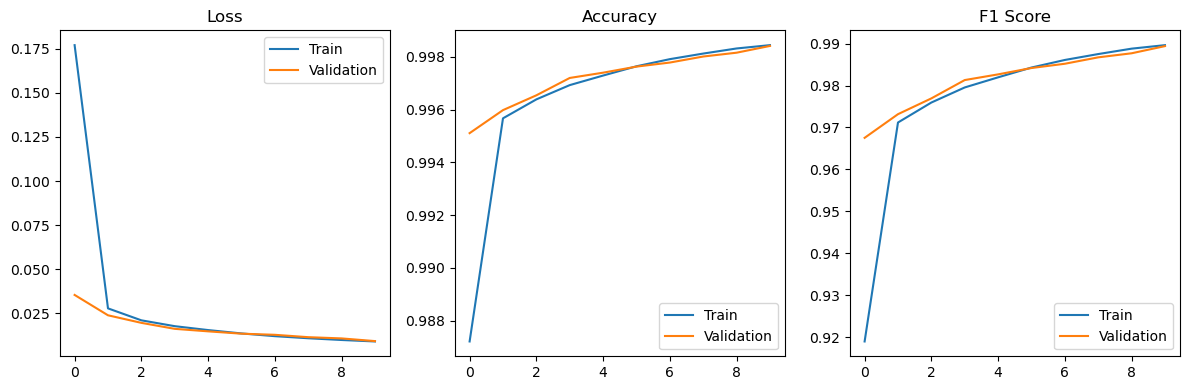

In [34]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history["train_loss"], label="Train")
plt.plot(history["val_loss"], label="Validation")
plt.title("Loss")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history["train_acc"], label="Train")
plt.plot(history["val_acc"], label="Validation")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history["train_f1"], label="Train")
plt.plot(history["val_f1"], label="Validation")
plt.title("F1 Score")
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix, classification_report


def evaluate_model_detailed(model, test_loader, threshold=0.5):
    """
    Evaluates the model on test data and prints detailed confusion matrix metrics.

    Parameters:
    model (nn.Module): The trained neural network model
    test_loader (DataLoader): DataLoader containing test data
    device (str): Device to run evaluation on ('cuda' or 'cpu')
    threshold (float): Decision threshold for binary classification

    Returns:
    dict: Dictionary containing detailed metrics
    """

    # Set model to evaluation mode
    model.eval()
    model = model.to(device)

    # Initialize lists to store predictions and targets
    all_preds = []
    all_targets = []

    # No gradient computation needed for evaluation
    with torch.no_grad():
        for inputs, targets in test_loader:
            # Move data to device
            inputs = inputs.to(device)

            # Permute inputs if needed [batch, seq_len, features] → [batch, features, seq_len]
            if inputs.shape[1] != model.encoder_blocks[0].conv[0].in_channels:
                inputs = inputs.permute(0, 2, 1)

            # Forward pass
            outputs = model(inputs)

            # Convert to binary predictions using threshold
            preds = (outputs > threshold).float()

            # Reshape targets if needed
            if targets.dim() != outputs.dim():
                targets = targets.unsqueeze(1)

            # Store predictions and targets
            all_preds.append(preds.cpu().numpy())
            all_targets.append(targets.cpu().numpy())

    # Flatten predictions and targets
    all_preds_flat = np.concatenate([p.flatten() for p in all_preds])
    all_targets_flat = np.concatenate([t.flatten() for t in all_targets])

    # Convert to binary values (0 or 1)
    all_preds_binary = (all_preds_flat > threshold).astype(int)
    all_targets_binary = (all_targets_flat > threshold).astype(int)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(
        all_targets_binary, all_preds_binary, labels=[0, 1]
    ).ravel()

    # Calculate rates and metrics
    total = tn + fp + fn + tp
    accuracy = (tp + tn) / total
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = (
        2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    )

    # Print detailed metrics
    print("\n===== DETAILED EVALUATION METRICS =====")
    print(f"Total test samples: {total}")
    print("\nRaw Counts:")
    print(f"True Positives (TP): {tp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")

    print("\nRates:")
    print(f"True Positive Rate (Recall/Sensitivity): {recall:.4f}")
    print(f"True Negative Rate (Specificity): {specificity:.4f}")
    print(f"False Positive Rate: {fp/(fp+tn):.4f}")
    print(f"False Negative Rate: {fn/(fn+tp):.4f}")

    print("\nOther Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Get class-wise report
    print("\nClassification Report:")
    report = classification_report(
        all_targets_binary, all_preds_binary, target_names=["Normal (0)", "Anomaly (1)"]
    )
    print(report)

    # Calculate AUC-ROC if needed (requires raw predictions before thresholding)
    # from sklearn.metrics import roc_auc_score
    # auc_roc = roc_auc_score(all_targets_binary, all_preds_flat)
    # print(f"AUC-ROC: {auc_roc:.4f}")

    # Return metrics dictionary for further analysis if needed
    metrics = {
        "true_positives": tp,
        "true_negatives": tn,
        "false_positives": fp,
        "false_negatives": fn,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "specificity": specificity,
        "f1_score": f1,
    }

    return metrics

In [36]:
metrics = evaluate_model_detailed(model, test_loader)

# You can access specific metrics if needed
print(f"F1 Score: {metrics['f1_score']}")


===== DETAILED EVALUATION METRICS =====
Total test samples: 5303296

Raw Counts:
True Positives (TP): 393060
True Negatives (TN): 4901801
False Positives (FP): 3424
False Negatives (FN): 5011

Rates:
True Positive Rate (Recall/Sensitivity): 0.9874
True Negative Rate (Specificity): 0.9993
False Positive Rate: 0.0007
False Negative Rate: 0.0126

Other Metrics:
Accuracy: 0.9984
Precision: 0.9914
F1 Score: 0.9894

Classification Report:
              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00   4905225
 Anomaly (1)       0.99      0.99      0.99    398071

    accuracy                           1.00   5303296
   macro avg       1.00      0.99      0.99   5303296
weighted avg       1.00      1.00      1.00   5303296

F1 Score: 0.9893839948147077
